# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [3]:
df = pd.read_csv("../input/frozen-dessert-production/Frozen_Dessert_Production.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [4]:
df

,DATE,IPN31152N
0,1972-01-01,59.962
1,1972-02-01,67.061
2,1972-03-01,74.235
3,1972-04-01,78.112
4,1972-05-01,84.764
...,...,...
568,2019-05-01,114.561
569,2019-06-01,124.960
570,2019-07-01,110.263
571,2019-08-01,102.609


In [5]:
df =  pd.read_csv("../input/frozen-dessert-production/Frozen_Dessert_Production.csv",
                 index_col="DATE",
                 parse_dates=True)

In [6]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

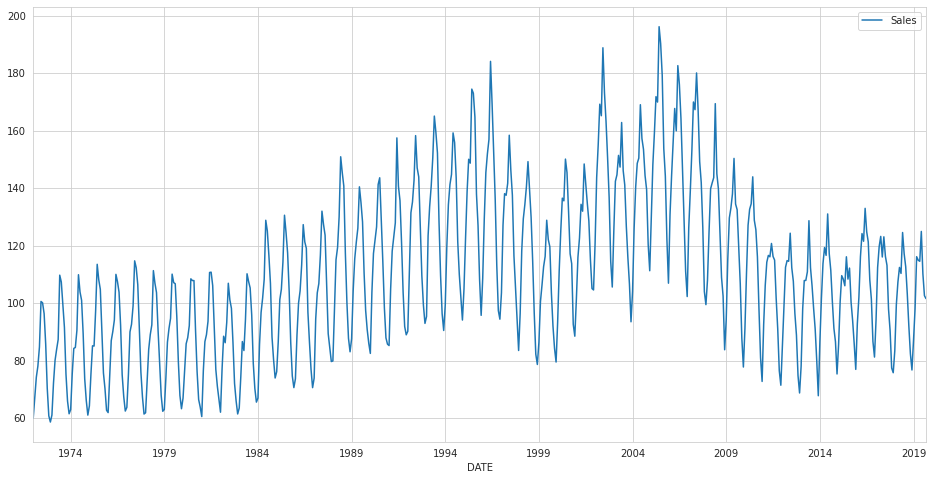

In [9]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [10]:
len(df)

573

In [11]:
test_size = 36

In [12]:
test_ind = len(df)- test_size
test_ind

537

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Sales
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2016-05-01,121.543
2016-06-01,132.987
2016-07-01,124.851


In [15]:
test

,Sales
DATE,
2016-10-01,101.384
2016-11-01,86.665
2016-12-01,81.257
2017-01-01,94.245
2017-02-01,112.388
2017-03-01,119.698
2017-04-01,123.228
2017-05-01,116.064
2017-06-01,123.087


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2022-03-20 16:41:41.332486: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [18]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [19]:
len(generator)

525

In [20]:
X, y = generator[0]

In [21]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [23]:
n_features = train_scaled.shape[1]

In [24]:
n_features

1

In [25]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

2022-03-20 16:41:45.396095: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-20 16:41:45.399097: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-20 16:41:45.440576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 16:41:45.441209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-03-20 16:41:45.441271: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-20 16:41:45.471271: I tensorflow/stream_executor/platform/def

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [29]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [30]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20


2022-03-20 16:41:48.048731: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-20 16:41:48.053133: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000150000 Hz
2022-03-20 16:41:50.266149: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-20 16:41:51.076444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-03-20 16:41:51.130799: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


525/525 [==============================] - 12s 7ms/step - loss: 0.0306 - val_loss: 0.0025
Epoch 2/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 3/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0061 - val_loss: 0.0041
Epoch 4/20
525/525 [==============================] - 3s 5ms/step - loss: 0.0041 - val_loss: 0.0055
Epoch 5/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 6/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0052 - val_loss: 0.0024
Epoch 7/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 8/20
525/525 [==============================] - 3s 5ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 9/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 10/20
525/525 [==============================] - 2s 5ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 11/

<AxesSubplot:>

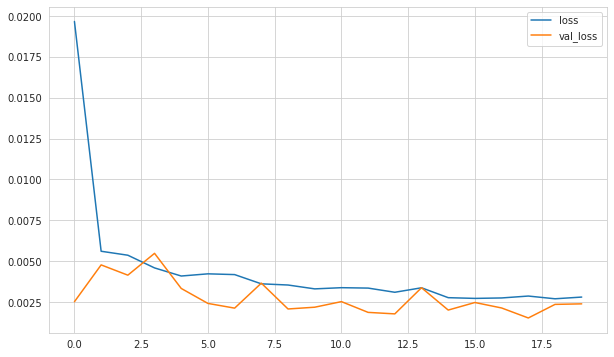

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [34]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
# CNN'de 3'ten 4'e çıkartıyor burda da 2'den 3'e çıkartıyor.
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch) # burdaki 2 boyutlu array çıkıyor ama biz bunu tek boyutlu array yapmamız lazım
    
    # store prediction
    predictions_scaled.append(current_pred[0]) # işte burada yukardaki 2 boyutluyu 3 boyutluya çıkarttık
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1) # burada da 2 boyutluyu 3'e çıkarttık
# 

In [35]:
current_pred

array([[0.42183322]], dtype=float32)

In [36]:
current_batch

array([[[0.27875611],
        [0.23631108],
        [0.2538029 ],
        [0.32473904],
        [0.40678227],
        [0.47013772],
        [0.52534759],
        [0.57466167],
        [0.59454209],
        [0.56703776],
        [0.50291187],
        [0.42183322]]])

In [37]:
predictions_scaled

[array([0.2787561], dtype=float32),
 array([0.23631108], dtype=float32),
 array([0.2538029], dtype=float32),
 array([0.32473904], dtype=float32),
 array([0.40678227], dtype=float32),
 array([0.47013772], dtype=float32),
 array([0.5253476], dtype=float32),
 array([0.5746617], dtype=float32),
 array([0.5945421], dtype=float32),
 array([0.56703776], dtype=float32),
 array([0.50291187], dtype=float32),
 array([0.42183322], dtype=float32)]

In [38]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.07589353411891753 
mae: 0.08270461158373175 
mse: 0.00924982412752996 
rmse: 0.0961760059865763


#### Inverse Transformations and Comparing

In [39]:
predictions = scaler.inverse_transform(predictions_scaled)

In [40]:
compare = test[:12]

In [41]:
compare['Predictions'] = predictions
compare

,Sales,Predictions
DATE,,
2016-10-01,101.384,96.993
2016-11-01,86.665,91.156
2016-12-01,81.257,93.561
2017-01-01,94.245,103.316
2017-02-01,112.388,114.598
2017-03-01,119.698,123.310
2017-04-01,123.228,130.902
2017-05-01,116.064,137.684
2017-06-01,123.087,140.418


<AxesSubplot:xlabel='DATE'>

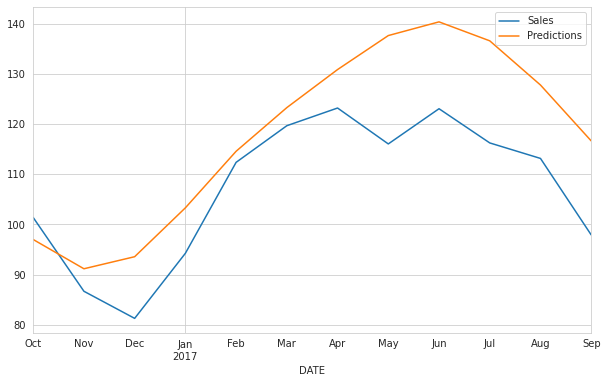

In [42]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [43]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.07589353411891742 
mae: 11.373033686864126 
mse: 174.91484665099927 
rmse: 13.225537669637452


### with "relu" activation function

In [44]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
525/525 [==============================] - 24s 43ms/step - loss: 0.0328 - val_loss: 0.0067
Epoch 2/20
525/525 [==============================] - 21s 41ms/step - loss: 0.0112 - val_loss: 0.0156
Epoch 3/20
525/525 [==============================] - 22s 42ms/step - loss: 0.0085 - val_loss: 0.0101
Epoch 4/20
525/525 [==============================] - 22s 42ms/step - loss: 0.0076 - val_loss: 0.0032
Epoch 5/20
525/525 [==============================] - 21s 41ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 6/20
525/525 [==============================] - 22s 41ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 7/20
525/525 [==============================] - 22s 42ms/step - loss: 0.0064 - val_loss: 0.0020
Epoch 8/20
525/525 [==============================] - 21s 40ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 9/20
525/525 [==============================] - 22s 41ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 10/20
525/525 [==============================] - 22s 42ms/step - loss: 0.003

<AxesSubplot:>

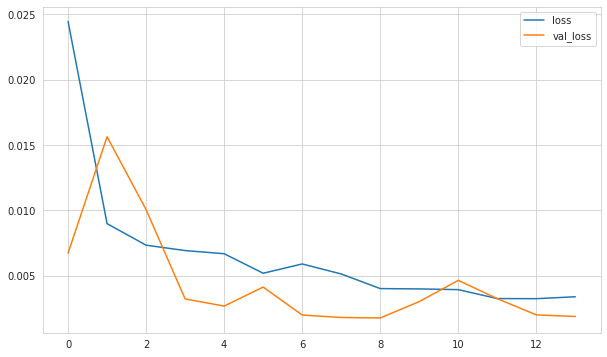

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [48]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
# CNN'de 3'ten 4'e çıkartıyor burda da 2'den 3'e çıkartıyor.
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch) # burdaki 2 boyutlu array çıkıyor ama biz bunu tek boyutlu array yapmamız lazım
    
    # store prediction
    predictions_scaled.append(current_pred[0]) # işte burada yukardaki 2 boyutluyu 3 boyutluya çıkarttık
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1) # burada da 2 boyutluyu 3'e çıkarttık
# 

In [49]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8723010769620683 
mae: 0.0318924424221576 
mse: 0.001278199669612368 
rmse: 0.03575191840464464


#### Inverse Transformations and Comparing

In [50]:
predictions = scaler.inverse_transform(predictions_scaled)

In [51]:
compare = test[:12]

In [52]:
compare['Predictions'] = predictions
compare

,Sales,Predictions
DATE,,
2016-10-01,101.384,96.661
2016-11-01,86.665,89.288
2016-12-01,81.257,86.928
2017-01-01,94.245,96.216
2017-02-01,112.388,105.092
2017-03-01,119.698,112.998
2017-04-01,123.228,118.208
2017-05-01,116.064,121.154
2017-06-01,123.087,122.393


<AxesSubplot:xlabel='DATE'>

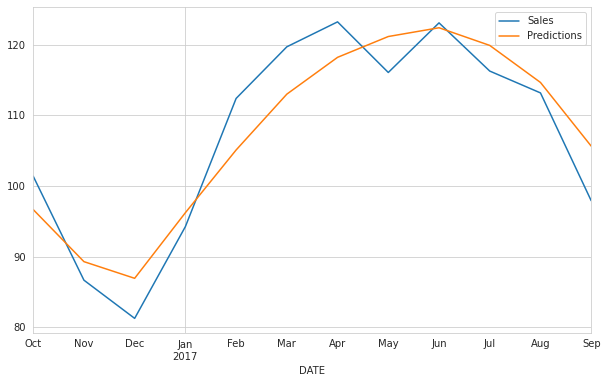

In [53]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [54]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.8723010769620683 
mae: 4.385654137996336 
mse: 24.17084866880688 
rmse: 4.9163857323044615


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [68]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [69]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [70]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [71]:
model.fit_generator(generator, epochs=20)

Epoch 1/20
561/561 [==============================] - 24s 40ms/step - loss: 0.0424
Epoch 2/20
561/561 [==============================] - 23s 40ms/step - loss: 0.0121
Epoch 3/20
561/561 [==============================] - 23s 41ms/step - loss: 0.0111
Epoch 4/20
561/561 [==============================] - 23s 42ms/step - loss: 0.0062
Epoch 5/20
561/561 [==============================] - 22s 40ms/step - loss: 0.0062
Epoch 6/20
561/561 [==============================] - 24s 42ms/step - loss: 0.0058
Epoch 7/20
561/561 [==============================] - 24s 42ms/step - loss: 0.0053
Epoch 8/20
561/561 [==============================] - 23s 41ms/step - loss: 0.0050
Epoch 9/20
561/561 [==============================] - 23s 41ms/step - loss: 0.0043
Epoch 10/20
561/561 [==============================] - 23s 41ms/step - loss: 0.0038
Epoch 11/20
561/561 [==============================] - 23s 41ms/step - loss: 0.0029
Epoch 12/20
561/561 [==============================] - 23s 41ms/step - loss: 0.0048
E

In [72]:
scaled_full_data.shape

(573, 1)

In [73]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [74]:
forecast = scaler.inverse_transform(forecast)

In [75]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

In [76]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [77]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [78]:
forecast_df

,Forecast
2019-11-01,88.008
2019-12-01,81.191
2020-01-01,80.419
2020-02-01,88.094
2020-03-01,98.704
2020-04-01,107.675
2020-05-01,112.422
2020-06-01,115.622
2020-07-01,116.480
2020-08-01,110.497


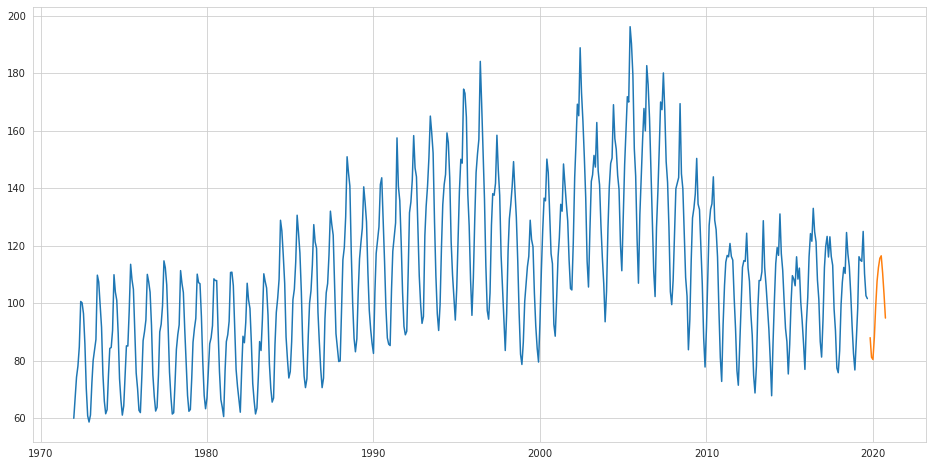

In [79]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

(576.0, 611.0)

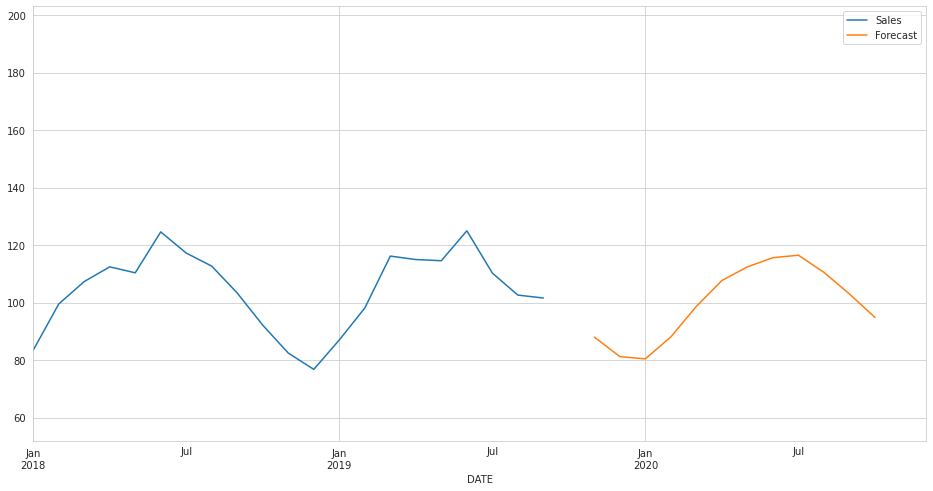

In [80]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')